## IMPORTING LIBRARIES 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error

In [3]:
data=pd.read_csv('tesla.csv')

## DATA ANALYSIS 

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
data['Date']=pd.to_datetime(data.Date)

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-01-07,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-02-07,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-06-07,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
data.shape

(2193, 7)

In [8]:
data.drop('Adj Close',axis=1,inplace=True)

In [9]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-01-07,25.000000,25.92,20.270000,21.959999,8218800
3,2010-02-07,23.000000,23.10,18.709999,19.200001,5139800
4,2010-06-07,20.000000,20.00,15.830000,16.110001,6866900


In [10]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2193 non-null   datetime64[ns]
 1   Open    2193 non-null   float64       
 2   High    2193 non-null   float64       
 3   Low     2193 non-null   float64       
 4   Close   2193 non-null   float64       
 5   Volume  2193 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 102.9 KB


In [12]:
data.describe()

,Open,High,Low,Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,3.716390e+07


## DATA VISUALIZATION 

Text(0.5, 0, 'Days')

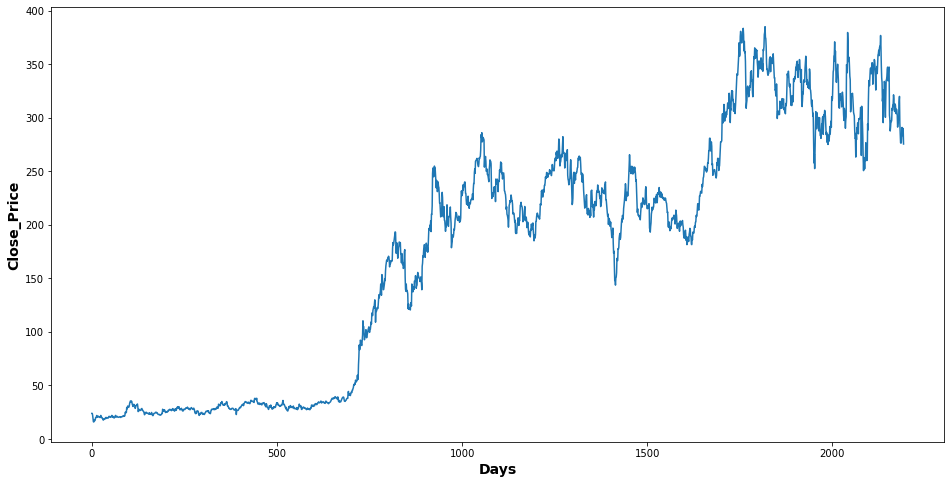

In [13]:
ay=data['Close'].plot(figsize=(16,8))
ay.set_ylabel('Close_Price',fontsize=14, fontweight='bold')
ay.set_xlabel('Days',fontsize=14, fontweight='bold')

In [16]:
X=data.drop('Close',axis=1)
X=X.drop('Date',axis=1)
X.head()

,Open,High,Low,Volume
0,19.000000,25.00,17.540001,18766300
1,25.790001,30.42,23.299999,17187100
2,25.000000,25.92,20.270000,8218800
3,23.000000,23.10,18.709999,5139800
4,20.000000,20.00,15.830000,6866900


In [17]:
y=data['Close']
y

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2188    290.920013
2189    283.359985
2190    288.959991
2191    289.959991
2192    275.429993
Name: Close, Length: 2193, dtype: float64

## Train Test Split with Holdout Set 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.head()

,Open,High,Low,Volume
1239,248.919998,249.399994,246.300003,2125800
1524,225.000000,229.100006,224.750000,3115100
264,27.790001,27.830000,27.400000,709000
53,20.540001,21.600000,20.530001,654700
1116,226.250000,229.720001,225.500000,5307700


## Scaling Data using Standard Scaler 

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.62688327,  0.59502632,  0.64273655, -0.65347888],
       [ 0.41929315,  0.4215622 ,  0.45262264, -0.43558689],
       [-1.29219732, -1.29829717, -1.28839708, -0.96552716],
       ...,
       [-0.44960007, -0.45866201, -0.45074915,  0.52656934],
       [-0.05368607, -0.01696909, -0.06469885,  1.38622185],
       [ 0.60024029,  0.60775847,  0.63567893,  0.25771181]])

In [23]:
scaled_X_test=scaler.transform(X_test)

## Elastic Net Model 

In [24]:
from sklearn.linear_model import ElasticNet

In [25]:
base_elastic_model=ElasticNet(max_iter=10000)

## Creating paramater grid for grid search  

In [26]:
param_grid={'alpha':[0.01,0.1,1,5,10,20,100],'l1_ratio':[.1,.7,.33,.5,.99,1] }

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid_model=GridSearchCV(base_elastic_model,
                       param_grid=param_grid,
                       scoring='neg_mean_squared_error',
                       cv=5,verbose=1)

In [29]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.1, 1, 5, 10, 20, 100],
                         'l1_ratio': [0.1, 0.7, 0.33, 0.5, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [30]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [31]:
y_pred=grid_model.predict(scaled_X_test)


In [32]:
print(r2_score(y_test,y_pred))

0.9996509715936013


In [33]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

2.195390840449457


In [34]:
df=pd.DataFrame({"Actual_Price":y_test,"Predicted_Price":y_pred})

In [35]:
df=df.sort_index(ascending=True)

In [36]:
df.head()

,Actual_Price,Predicted_Price
14,20.299999,20.815319
17,21.290001,21.368315
18,20.950001,20.833822
30,17.900000,18.379276
39,19.200001,19.433902


## PREDICTION VISUALIZATION 

Text(0.5, 0, 'Days')

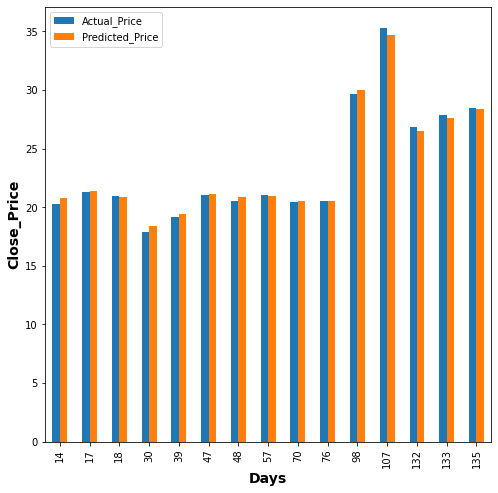

In [37]:
graph=df.head(15).plot(kind='bar',figsize=(8,8))
graph.set_ylabel('Close_Price',fontsize=14, fontweight='bold')
graph.set_xlabel('Days',fontsize=14, fontweight='bold')

Text(0.5, 0, 'Days')

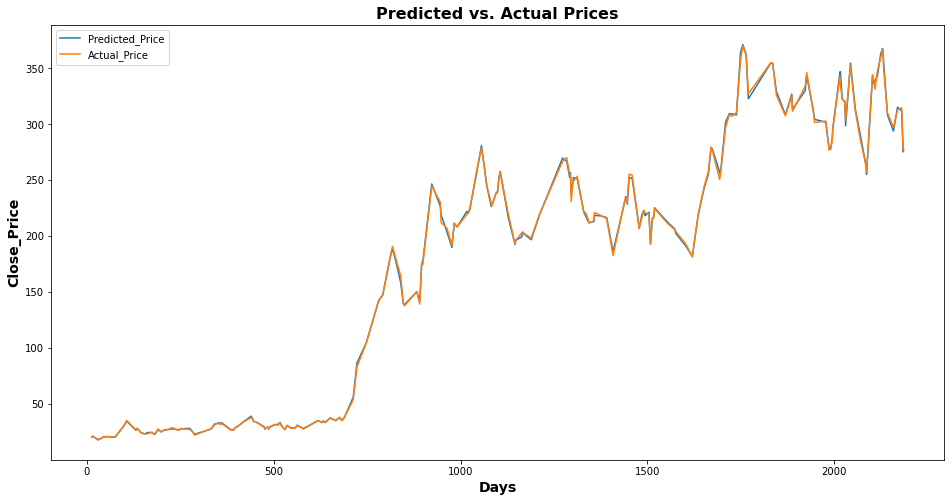

In [38]:
az=df[['Predicted_Price','Actual_Price']].plot(figsize=(16,8))
az.set_title('Predicted vs. Actual Prices', fontsize=16, fontweight='bold')
az.set_ylabel('Close_Price',fontsize=14, fontweight='bold')
az.set_xlabel('Days',fontsize=14, fontweight='bold')